In [1]:
import datetime
import pandas as pd
import seaborn as sb

In [2]:
login = pd.read_csv('results/task1_1_1.csv')
study = pd.read_csv('results/task1_1_2.csv')
users = pd.read_csv('results/task1_1_3.csv')

In [3]:
def weekday(x):
    x = datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').isoweekday()
    return x
login['weekday'] = login.login_time.apply(weekday).astype('int')
login['hour'] = login.login_time.apply(lambda x:x[11:13]).astype('int')
login['isweekend'] = login.weekday.apply(lambda x:1 if x>5 else 0)
login['hour'] = login.hour.apply(lambda x:int(x/4)*4)
login

,user_id,login_time,login_place,weekday,hour,isweekend
0,用户3,2018-09-06 09:32:47,中国广东广州,4,8,0
1,用户3,2018-09-07 09:28:28,中国广东广州,5,8,0
2,用户3,2018-09-07 09:57:44,中国广东广州,5,8,0
3,用户3,2018-09-07 10:55:07,中国广东广州,5,8,0
4,用户3,2018-09-07 12:28:42,中国广东广州,5,12,0
...,...,...,...,...,...,...
387139,用户44247,2020-06-18 07:41:22,中国湖北武汉,4,4,0
387140,用户44247,2020-06-18 08:13:28,中国湖北,4,8,0
387141,用户44248,2020-06-18 09:09:07,中国天津,4,8,0
387142,用户44249,2020-06-18 09:43:15,中国北京,4,8,0


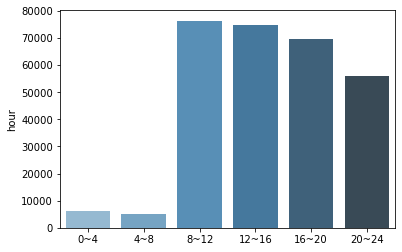

In [4]:
a = pd.DataFrame(login[login.isweekend==0].hour.value_counts().sort_index()).reset_index()
a.index = ['0~4', '4~8', '8~12', '12~16', '16~20', '20~24']
sb.barplot(x=a.index, y=a.hour, palette="Blues_d").get_figure().savefig('results/task2_2_1.svg')

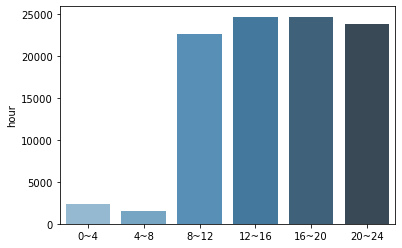

In [5]:
a = pd.DataFrame(login[login.isweekend==1].hour.value_counts().sort_index()).reset_index()
a.index = ['0~4', '4~8', '8~12', '12~16', '16~20', '20~24']
sb.barplot(x=a.index, y=a.hour, palette="Blues_d").get_figure().savefig('results/task2_2_2.svg')